# **Data exploration - Phishing URL**


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [3]:
dataset = pd.read_csv("phishing_dataset.csv")

dataset.describe()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.0,247950.0,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,0.481585,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,...,0.064529,0.224013,1.0,0.0,2.606977,0.126501,0.002303,0.000944,4.257222,3.389839
std,0.499662,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,...,0.245694,1.276447,0.0,0.0,1.636938,0.332414,0.047933,0.030706,0.328098,0.376361
min,0.000000,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274
25%,0.000000,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.038910,3.180833
50%,0.000000,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.208298,3.392747
75%,1.000000,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,0.0,3.000000,0.000000,0.000000,0.000000,4.428036,3.606937
max,1.000000,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,...,1.000000,44.000000,1.0,0.0,28.000000,1.000000,1.000000,1.000000,5.866327,4.957323


In [4]:
dataset.head()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [6]:
print("Shape: " ,dataset.shape)
print(dataset.columns)

Shape:  (247950, 42)
Index(['Type', 'url_length', 'number_of_dots_in_url',
       'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'havin

---

# Training Model - [xggBoost Classifier](https://xgboost.readthedocs.io/en/stable/)


We picked `xgg` because:

- The `sklearn` alternative [sklearn.ensemble.GradientBoostingClassifier](sklearn.ensemble.GradientBoostingClassifier) is slower since it does not have good parallelization.
- **Depth-wise Tree Pruning:** The depth-wise growth strategy of tree pruning used in XGBoost prevents overgrowth of trees better than the level-wise strategy in sklearn.ensemble.GradientBoostingClassifier. For our URL data, which may have intricate interactions, this pruning helped avoid overfitting while capturing relevant patterns.
- **Built-in Cross-validation:** Utilizing XGBoost's internal cross-validation allowed us to efficiently tune and prevent overfitting without the need for extensive external cross-validation code. This feature is more sophisticated than the traditional cross-validation approach provided by Scikit-learn, enabling more streamlined model development.
- **Parallel Processing:** The ability to run multiple trees in parallel provided by XGBoost made the training process significantly faster compared to sklearn.ensemble.GradientBoostingClassifier, which is particularly advantageous given the large volume of data in phishing detection tasks.
- **Hyperparameter Tuning:** The hyperparameter tuning with XGBoost is generally more effective due to its larger hyperparameter space, including parameters for regularizing model complexity. This extensive search was essential for optimizing our model's performance on a complex phishing detection task.
- **High ROC-AUC Score:** Achieving a high ROC-AUC score indicated that XGBoost was particularly effective at differentiating between classes in our unbalanced dataset, where it is crucial to minimize both false positives and false negatives.


In [9]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

# Columns are features and 'Type' is the target

# Separating the features and target
X = dataset.drop('Type', axis=1)
y = dataset['Type']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
 
# Set up the parameter grid for random search
param_grid = {
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'n_estimators': range(50, 500),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 10),
    'gamma': np.linspace(0, 0.5, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6)
}

# XGBoost Classifier
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=100, scoring=make_scorer(roc_auc_score), cv=3,
    verbose=5, random_state=42, n_jobs=-1
)

# Fitting the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict probabilities on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"The ROC-AUC score for the optimized model is: {roc_auc}")

# Output the best parameters
print("Best parameters found: ", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=1.0, gamma=0.4444444444444444, learning_rate=0.16, max_depth=4, min_child_weight=4, n_estimators=165, subsample=1.0;, score=0.889 total time=   4.3s
[CV 3/3] END colsample_bytree=1.0, gamma=0.4444444444444444, learning_rate=0.16, max_depth=4, min_child_weight=4, n_estimators=165, subsample=1.0;, score=0.892 total time=   4.4s
[CV 2/3] END colsample_bytree=1.0, gamma=0.4444444444444444, learning_rate=0.16, max_depth=4, min_child_weight=4, n_estimators=165, subsample=1.0;, score=0.890 total time=   4.9s
[CV 1/3] END colsample_bytree=0.8, gamma=0.38888888888888884, learning_rate=0.09999999999999999, max_depth=7, min_child_weight=8, n_estimators=193, subsample=1.0;, score=0.906 total time=   7.3s
[CV 2/3] END colsample_bytree=0.8, gamma=0.38888888888888884, learning_rate=0.09999999999999999, max_depth=7, min_child_weight=8, n_estimators=193, subsample=1.0;, score=0.907 total time=   8.1s
[CV 3/3] E

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Threshold for classification
threshold = 0.5  # when are we labeling a sample as positive? this is the threshold for that guys
y_pred_class = (y_pred_proba >= threshold).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy*100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred_class)
print(f"Precision: {precision*100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred_class)
print(f"Recall: {recall*100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred_class)
print(f"F1 Score: {f1*100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print(f"Confusion Matrix:\n{conf_matrix}")

# Specificity (True Negative Rate)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn+fp)
print(f"Specificity (True Negative Rate): {specificity*100:.2f}%")


Accuracy: 94.23%
Precision: 95.49%
Recall: 92.40%
F1 Score: 93.92%
Confusion Matrix:
[[18481   782]
 [ 1363 16567]]
Specificity (True Negative Rate): 95.94%


In [13]:
print("Best parameters found: ", random_search.best_params_)
print(f"The ROC-AUC score for the optimized model is: {roc_auc*100}")

Best parameters found:  {'subsample': 0.6, 'n_estimators': 426, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.5}
The ROC-AUC score for the optimized model is: 98.4481477643581


---

# **Result analysis**

<br>

## **Primary Metric**

We had a [ROC-AUC](https://es.wikipedia.org/wiki/Curva_ROC) score of **98.44%**. We picked **ROC-AUC** because we it evaluates how well the model can identify phishing URLs versus legitimate ones, regardless of where we set the cutoff between the two. This "cutoff" is what we call a classification threshold. It’s the point at which the model decides whether a URL is more likely to be phishing or not. Using ROC-AUC allows us to see the model's performance in a broad sense, without having to commit to a specific cutoff point right away. This makes it especially helpful for tasks where it's important to balance detecting true threats (phishing URLs) without mistakenly labeling safe ones as threats

What does this means:

1. **Ranking Ability:** The score tells us that the model is very good at ranking positive examples (phishing URLs) higher than negative examples (legitimate URLs). A score of 0.9844 means there is a 98.44% chance that a randomly chosen positive example will be ranked higher than a randomly chosen negative example by the model.
2. **Threshold Independence:** The ROC-AUC score is independent of any particular threshold. It evaluates the model across all possible thresholds, providing a comprehensive measure of its performance.
3. **True Positive vs. False Positive Trade-off:** The score summarizes the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across all thresholds. A higher score indicates that the model can achieve high sensitivity without sacrificing specificity.

## **Secondary Metrics**

We maximized through the training process to get **the best ROC-AUC SCORE** possible, but its valuable nonetheless to know what other metrics ended up being with our current  model:

- **Accuracy (94.23%)**: This metric indicates that the model correctly predicts both phishing and legitimate URLs about 94.23% of the time. It’s a general measure of how often the model is correct.

- **Precision (95.49%)**: Precision tells us that when the model predicts a URL is phishing, it is correct 95.49% of the time. This is important for minimizing false alarms.

- **Recall (92.40%)**: This indicates that the model successfully identifies 92.40% of all actual phishing URLs. High recall is crucial for ensuring that few phishing urls are missed.

- **F1 Score (93.92%)**: The F1 score balances precision and recall in a single metric. A score of 93.92% is quite high in our experience, indicating a strong balance between precision and recall, which is often challenging to achieve.

- **Specificity (True Negative Rate) (95.94%)**: Specificity measures the proportion of actual negatives (legitimate URLs) that are correctly identified. A specificity of 95.94% means the model is very good at recognizing legitimate URLs, which helps in reducing false positives.

### **Confusion Matrix**
The confusion matrix provides a visual way to examine the accuracy of a classification model. Numbers in the matrix show the following:
- Top-left: True negatives (legitimate URLs correctly identified)
- Top-right: False positives (legitimate URLs incorrectly labeled as phishing)
- Bottom-left: False negatives (phishing URLs missed by the model)
- Bottom-right: True positives (phishing URLs correctly identified)


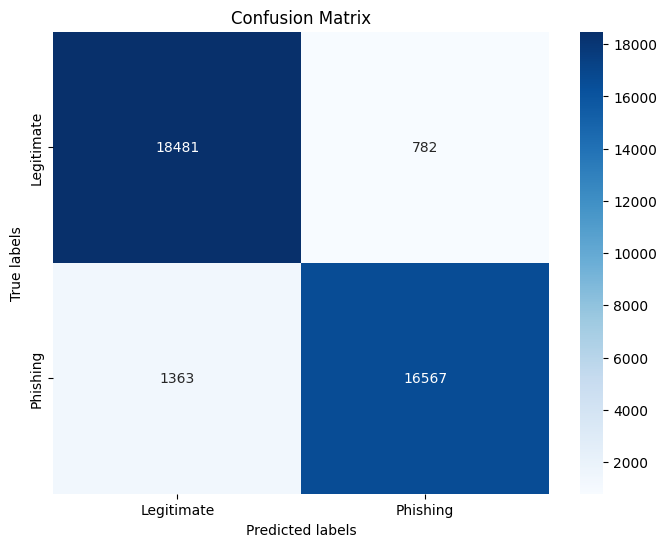

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_class)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Legitimate', 'Phishing'])
ax.yaxis.set_ticklabels(['Legitimate', 'Phishing'])
plt.show()

---


# **Learning Curve and Model Generalization Analysis**

As we examine our learning curve, we observe the following key points:

### **Training and Cross-validation Scores**
- The **training score** remains high and stable across increasing data sizes, showing our model's strong fit to the training data.
- The **cross-validation score** converges towards the training score as more data is introduced, indicating an improvement in generalizing to unseen data.

### **Assessment of Overfitting**
- The minimal gap between training and cross-validation scores suggests a **low probability of overfitting**. In situations of overfitting, we would typically see a larger divergence. Keep in mind that our graph scale truncates the **y axis** because the difference is so small that otherwise it would not be visible.

### **Further Considerations for Generalization**
- Despite the promising ROC-AUC scores, we must consider **class balance**. A high score can sometimes mask performance issues on a minority class in an imbalanced dataset. Thankfully, our data was balanced since we had it *categorized* into 128,541 phishing URLs and 119,409 legitimate URLs* (a split of ~48% and ~52% respectively) which is very close to a 1:1 ratio.
- The possibility of **data diversity** limitations means our model might not be exposed to all phishing URL patterns, particularly new or emergent ones.
- **Feature representativeness** is crucial. The exclusion of pivotal features could lead to underperformance against certain phishing URLs.
- The **robustness** of our model should be scrutinized by testing against an external dataset to validate performance stability.
- Lastly, the presence of **noise and outliers** in real-world data can impact model predictions, so ideally any url fed into the model to get a prediction should pass through the same preprocessing steps.


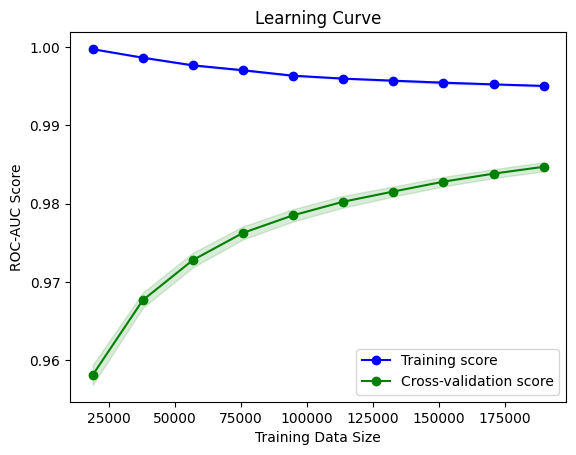

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=10, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('ROC-AUC Score')
plt.legend(loc='lower right')
plt.show()


---

# **Serializing the Model**

To use the model later, we need to *serialize it*. We are gonna do it with joblib. This time we dont have `custom objects` (like special transformers or classes) because everything is from the base `xgboost library`. So we only need to serialize the model

## 

In [19]:
import joblib

joblib.dump(best_model, "phishing_probability_predictor_model.pkl")

['phishing_probability_predictor_model.pkl']

<br>

Then, to load the model we just do it like this:

In [ ]:
loaded_phishing_probability_predictor_model = joblib.load('phishing_probability_predictor_model.pkl')

